## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Data

In [2]:
data = pd.read_csv('../data.csv', encoding='latin-1')

In [3]:
data

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,Failed,2011,3,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info
468,Company469,Failed,No Info,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
469,Company470,Failed,2010,4,0.0,Real Time Social Media Analytics,Analytics|E-Commerce,CAMPAIGN MANAGEMENT,NaN,0.0,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info
470,Company471,Failed,2009,5,0.0,Social Media Publishing and Analytics,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.9+ KB


In [5]:
data.describe()

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,407.000000,306.000000,267.000000,3.120000e+02,472.000000,472.000000,472.000000,390.000000
mean,114.159705,31.408497,-1.299625,6.379489e+06,1.868644,1.016949,3.730932,2.889744
std,225.651419,62.673600,23.967085,9.901622e+06,1.143481,2.014736,2.516539,0.845765
min,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,-3.500000,4.250000,0.000000,7.500000e+05,1.000000,0.000000,2.000000,2.000000
50%,60.000000,13.000000,0.000000,2.800000e+06,2.000000,0.000000,3.000000,3.000000
75%,216.000000,31.000000,6.000000,7.850000e+06,2.250000,1.000000,5.000000,3.000000
max,1535.000000,594.000000,50.000000,7.700000e+07,7.000000,13.000000,24.000000,5.000000


In [6]:
data.describe(include=object)

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Short Description of company profile,Industry of company,Focus functions of company,Investors,Has the team size grown,Est. Founding Date,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
count,472,472,472,428,323,348,442,332,422,363,...,472,472,472,472,472,472,472,472,472,472
unique,472,2,16,16,313,192,164,319,5,160,...,86,117,62,56,78,10,24,30,37,13
top,Company1,Success,2010,4,Big Data Analytics,Analytics,Operations,TechStars,No,1/1/2011,...,0,0,0,0,0,0,0,0,0,0
freq,1,305,76,76,4,53,31,7,266,30,...,200,118,212,233,217,403,379,360,323,97


In [7]:
# Iterate over each column in the DataFrame
for col in data.columns:
    
    # Try to convert each value in the column to lowercase
    try:
        data[col] = data[col].str.lower()
        
    # If an error occurs (e.g., the column doesn't contain strings), ignore it
    except:
        pass

In [8]:
# Iterate over each column in the DataFrame
for i in data.columns:
    
    # Print the column name and its unique values
    print(i, data[i].unique())

Company_Name ['company1' 'company2' 'company3' 'company4' 'company5' 'company6'
 'company7' 'company8' 'company9' 'company10' 'company11' 'company12'
 'company13' 'company14' 'company15' 'company16' 'company17' 'company18'
 'company19' 'company20' 'company21' 'company22' 'company23' 'company24'
 'company25' 'company26' 'company27' 'company28' 'company29' 'company30'
 'company31' 'company32' 'company33' 'company34' 'company35' 'company36'
 'company37' 'company38' 'company39' 'company40' 'company41' 'company42'
 'company43' 'company44' 'company45' 'company46' 'company47' 'company48'
 'company49' 'company50' 'company51' 'company52' 'company53' 'company54'
 'company55' 'company56' 'company57' 'company58' 'company59' 'company60'
 'company61' 'company62' 'company63' 'company64' 'company65' 'company66'
 'company67' 'company68' 'company69' 'company70' 'company71' 'company72'
 'company73' 'company74' 'company75' 'company76' 'company77' 'company78'
 'company79' 'company80' 'company81' 'company82

In [9]:
# Set 'Company Name' as index
data.set_index("Company_Name",inplace=True)

In [10]:
# Replace 'no info', 'unknown amount' with NaN
data = data.replace(['no info', 'unknown amount'], np.nan)

In [11]:
# Renaming long column names
data.rename(columns={'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive'
                   :"Capital intensive business", 'Survival through recession, based on existence of the company through recession times':
                  "Survival through recession", "Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?"
                  :"Top forums talking about company/Model", "Avg time to investment - average across all rounds, measured from previous investment":
                  "Average time of investment"},inplace=True)

In [12]:
# List of columns to be changed to float type
need_to_be_changed = ["year of founding", "Age of company in years", "Team size all employees",
                      "Number of Investors in Seed", "Number of Investors in Angel and or VC", "Number of of repeat investors",
                     "Years of education", "Renowned in professional circle", "Experience in Fortune 100 organizations",
                     "Experience in Fortune 500 organizations", "Experience in Fortune 1000 organizations", "Skills score",
                     "Number of Recognitions for Founders and Co-founders", "google page rank of company website",
                     "Industry trend in investing", "Number of Direct competitors", "Employees per year of company existence",
                     "Last round of funding received (in milionUSD)", "Time to 1st investment (in months)", "Average time of investment",
                     "Percent_skill_Entrepreneurship", "Percent_skill_Operations", "Percent_skill_Engineering", "Percent_skill_Marketing",
                     "Percent_skill_Leadership", "Percent_skill_Data Science", "Percent_skill_Business Strategy", "Percent_skill_Product Management",
                     "Percent_skill_Sales", "Percent_skill_Domain", "Percent_skill_Law", "Percent_skill_Consulting",
                     "Percent_skill_Finance", "Percent_skill_Investment", "Renown score"]

In [13]:
# Convert specified columns to float type
data[need_to_be_changed] = data[need_to_be_changed].astype("float64")

## Observing NaN Features

In [14]:
# Calculate the sum of null values in each column of the DataFrame
data.isnull().sum()

Dependent-Company Status                  0
year of founding                         59
Age of company in years                  59
Internet Activity Score                  65
Short Description of company profile    149
                                       ... 
Percent_skill_Law                        61
Percent_skill_Consulting                 61
Percent_skill_Finance                    61
Percent_skill_Investment                 61
Renown score                             61
Length: 115, dtype: int64

In [15]:
# Calculate the total sum of null values in the entire DataFrame
data.isnull().sum().sum()

9053

In [16]:
# Calculate the percentage of null values in each column relative to the total number of rows in the DataFrame
100 * data.isnull().sum() / len(data)

Dependent-Company Status                 0.000000
year of founding                        12.500000
Age of company in years                 12.500000
Internet Activity Score                 13.771186
Short Description of company profile    31.567797
                                          ...    
Percent_skill_Law                       12.923729
Percent_skill_Consulting                12.923729
Percent_skill_Finance                   12.923729
Percent_skill_Investment                12.923729
Renown score                            12.923729
Length: 115, dtype: float64

In [17]:
# Define a function to calculate the percentage of missing values in each column
def percent_missing(data):
    percent_nan = 100* data.isnull().sum() / len(data)
    
    # Filter columns with missing values exceeding 20% and sort them
    percent_nan = percent_nan[percent_nan>20].sort_values()
    return percent_nan

In [18]:
# Calculate the percentage of missing values
percent_nan = percent_missing(data)

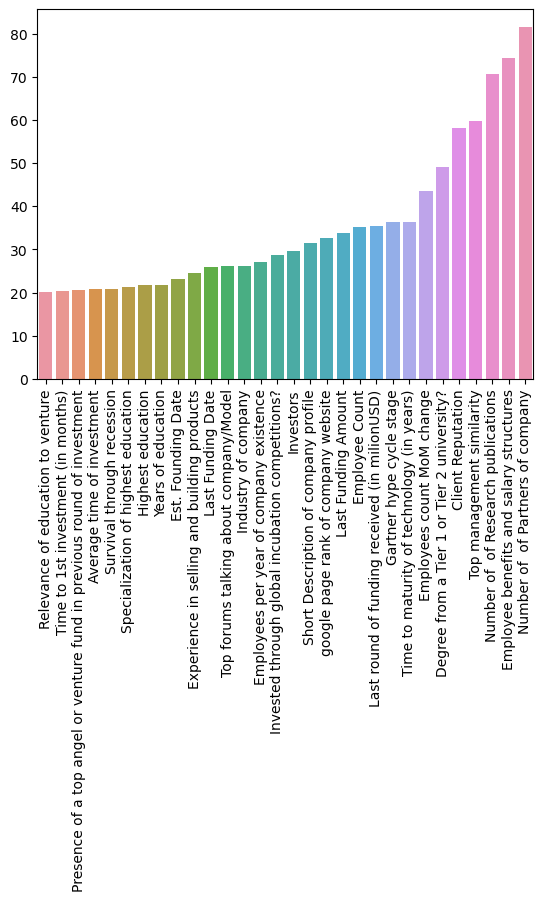

In [19]:
# Create a bar plot to visualize columns with missing values exceeding 20%
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [20]:
# Set the threshold for dropping columns with missing values
threshold = 0.36

# Calculate the percentage of missing values for each column
cols_to_drop = data.isnull().sum() / len(data)

# Print columns with missing values exceeding the threshold
print(cols_to_drop[cols_to_drop > threshold])

Employees count MoM change                    0.434322
Number of  of Partners of company             0.815678
Degree from a Tier 1 or Tier 2 university?    0.491525
Top management similarity                     0.597458
Number of  of Research publications           0.707627
Employee benefits and salary structures       0.743644
Client Reputation                             0.580508
Gartner hype cycle stage                      0.364407
Time to maturity of technology (in years)     0.364407
dtype: float64


In [21]:
# Drop columns with missing values exceeding the threshold
data.drop(columns=cols_to_drop[cols_to_drop > threshold].index, axis=1, inplace=True)

In [22]:
data.isnull().sum().sum()

6646

## Filling In Missing Column Data

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
# Select numerical columns
data_nums = data.select_dtypes(exclude='object')

# Select object-type columns
data_objs = data.select_dtypes(include='object')

In [25]:
# Create a SimpleImputer object with strategy='mean' to fill missing values with the mean of each numerical column
imputer = SimpleImputer(strategy='mean')

# Fill missing values in numerical columns with the mean
data[data_nums.columns] = imputer.fit_transform(data[data_nums.columns])

In [26]:
# Create a SimpleImputer object with strategy='most_frequent' to fill missing values with the most frequent value of each categorical column
imputer2 = SimpleImputer(strategy='most_frequent')

# Fill missing values in categorical columns with the most frequent value
data[data_objs.columns] = imputer2.fit_transform(data[data_objs.columns])

In [27]:
# Convert the "Est. Founding Date" and "Last Funding Date" columns to datetime format
data["Est. Founding Date"]=pd.to_datetime(data["Est. Founding Date"])
data["Last Funding Date"]=pd.to_datetime(data["Last Funding Date"])

In [28]:
data.isnull().sum().sum()

0

## Getting some insights

In [29]:
# Iterate over each column in the DataFrame
for col in data.columns:
    
    # Print the column name
    print(col)
    
    # Group the data by "Dependent-Company Status" and the current column, calculate value counts normalized by group, and display the result
    counts = data.groupby(["Dependent-Company Status"],as_index=False)[col].value_counts(normalize=True)
    counts.sort_values(col) # Sort the counts
    display(counts)
    
    print()# Print an empty line for separation

Dependent-Company Status


,Dependent-Company Status,proportion
0,failed,1.0
1,success,1.0



year of founding


,Dependent-Company Status,year of founding,proportion
0,failed,2009.394673,0.305389
1,failed,2007.000000,0.119760
2,failed,2010.000000,0.095808
3,failed,2008.000000,0.095808
4,failed,2009.000000,0.095808
5,failed,2011.000000,0.089820
6,failed,2005.000000,0.065868
7,failed,2006.000000,0.059880
8,failed,2012.000000,0.029940
9,failed,2013.000000,0.011976



Age of company in years


,Dependent-Company Status,Age of company in years,proportion
0,failed,4.605327,0.305389
1,failed,7.000000,0.119760
2,failed,4.000000,0.095808
3,failed,5.000000,0.095808
4,failed,6.000000,0.095808
5,failed,3.000000,0.089820
6,failed,9.000000,0.065868
7,failed,8.000000,0.059880
8,failed,2.000000,0.029940
9,failed,1.000000,0.011976



Internet Activity Score


,Dependent-Company Status,Internet Activity Score,proportion
0,failed,114.159705,0.263473
1,failed,0.000000,0.113772
2,failed,-8.000000,0.023952
3,failed,-4.000000,0.017964
4,failed,-3.000000,0.017964
...,...,...,...
297,success,76.000000,0.003279
298,success,78.000000,0.003279
299,success,81.000000,0.003279
300,success,83.000000,0.003279



Short Description of company profile


,Dependent-Company Status,Short Description of company profile,proportion
0,failed,big data analytics,0.443114
1,failed,youtube for pictures,0.011976
2,failed,online wine service,0.011976
3,failed,social media marketing,0.011976
4,failed,media hosting,0.011976
...,...,...,...
308,success,game development and monetization,0.003279
309,success,global multimedia content platform,0.003279
310,success,google analytics for forms,0.003279
311,success,health care analytics,0.003279



Industry of company


,Dependent-Company Status,Industry of company,proportion
0,failed,analytics,0.419162
1,failed,e-commerce,0.041916
2,failed,mobile,0.029940
3,failed,advertising,0.017964
4,failed,music,0.017964
...,...,...,...
210,success,analytics|security|network / hosting / infrast...,0.003279
211,success,analytics|security|enterprise software,0.003279
212,success,analytics|search|hospitality,0.003279
213,success,analytics|retail|mobile|enterprise software|ma...,0.003279



Focus functions of company


,Dependent-Company Status,Focus functions of company,proportion
0,failed,marketing,0.263473
1,failed,operations,0.125749
2,failed,operation,0.095808
3,failed,analytics,0.059880
4,failed,advertising,0.053892
...,...,...,...
156,success,elearning,0.003279
157,success,e-learning,0.003279
158,success,"data visualization, content marketing, present...",0.003279
159,success,data visualization,0.003279



Investors


,Dependent-Company Status,Investors,proportion
0,failed,techstars,0.467066
1,failed,evergreen venture partners|sefi visiger|yair g...,0.011976
2,failed,polaris venture partners|harrison metal capita...,0.005988
3,failed,mission ventures|valhalla partners|windward ve...,0.005988
4,failed,overbrook entertainment,0.005988
...,...,...,...
315,success,foresight ventures|bright capital|techstars,0.003279
316,success,foundation capital|voyager capital|stanford un...,0.003279
317,success,foundry group|neu venture capital|david cohen|...,0.003279
318,success,foundry group|softtech vc|troy henikoff|david ...,0.003279



Employee Count


,Dependent-Company Status,Employee Count,proportion
0,failed,31.408497,0.580838
1,failed,0.000000,0.089820
2,failed,1.000000,0.077844
3,failed,2.000000,0.023952
4,failed,6.000000,0.023952
...,...,...,...
103,success,57.000000,0.003279
104,success,58.000000,0.003279
105,success,65.000000,0.003279
106,success,67.000000,0.003279



Has the team size grown


,Dependent-Company Status,Has the team size grown,proportion
0,failed,no,0.862275
1,failed,yes,0.137725
2,success,no,0.567213
3,success,yes,0.432787



Est. Founding Date


,Dependent-Company Status,Est. Founding Date,proportion
0,failed,2011-01-01,0.425150
1,failed,2008-01-01,0.053892
2,failed,2005-01-01,0.035928
3,failed,2010-01-01,0.023952
4,failed,2007-01-01,0.023952
...,...,...,...
183,success,2009-03-01,0.003279
184,success,2009-02-06,0.003279
185,success,2009-01-30,0.003279
186,success,2009-01-02,0.003279



Last Funding Date


,Dependent-Company Status,Last Funding Date,proportion
0,failed,2011-01-01,0.395210
1,failed,2009-01-01,0.017964
2,failed,2007-06-01,0.017964
3,failed,2010-03-01,0.011976
4,failed,2008-04-15,0.011976
...,...,...,...
295,success,2012-06-27,0.003279
296,success,2012-06-28,0.003279
297,success,2012-07-07,0.003279
298,success,2012-07-12,0.003279



Last Funding Amount


,Dependent-Company Status,Last Funding Amount,proportion
0,failed,6.379489e+06,0.437126
1,failed,1.000000e+06,0.035928
2,failed,5.000000e+05,0.029940
3,failed,1.800000e+04,0.023952
4,failed,5.000000e+06,0.023952
...,...,...,...
174,success,1.800000e+06,0.003279
175,success,1.750000e+06,0.003279
176,success,1.530000e+06,0.003279
177,success,1.320384e+06,0.003279



Country of company


,Dependent-Company Status,Country of company,proportion
0,failed,united states,0.892216
1,failed,israel,0.017964
2,failed,austria,0.011976
3,failed,united kingdom,0.011976
4,failed,france,0.011976
5,failed,canada,0.011976
6,failed,spain,0.005988
7,failed,india,0.005988
8,failed,estonia,0.005988
9,failed,italy,0.005988



Continent of company


,Dependent-Company Status,Continent of company,proportion
0,failed,north america,0.904192
1,failed,europe,0.071856
2,failed,asia,0.023952
3,success,north america,0.747541
4,success,europe,0.209836
5,success,asia,0.036066
6,success,south america,0.006557



Number of Investors in Seed


,Dependent-Company Status,Number of Investors in Seed,proportion
0,failed,0.000000,0.455090
1,failed,1.546099,0.275449
2,failed,1.000000,0.185629
3,failed,2.000000,0.029940
4,failed,7.000000,0.011976
5,failed,6.000000,0.011976
6,failed,12.000000,0.005988
7,failed,8.000000,0.005988
8,failed,5.000000,0.005988
9,failed,3.000000,0.005988



Number of Investors in Angel and or VC


,Dependent-Company Status,Number of Investors in Angel and or VC,proportion
0,failed,0.000000,0.562874
1,failed,0.576832,0.275449
2,failed,1.000000,0.089820
3,failed,2.000000,0.035928
4,failed,4.000000,0.011976
5,failed,6.000000,0.011976
6,failed,5.000000,0.005988
7,failed,3.000000,0.005988
8,success,0.000000,0.747541
9,success,1.000000,0.108197



Number of Co-founders


,Dependent-Company Status,Number of Co-founders,proportion
0,failed,1.0,0.311377
1,failed,2.0,0.293413
2,failed,0.0,0.197605
3,failed,3.0,0.155689
4,failed,4.0,0.029940
5,failed,5.0,0.005988
6,failed,6.0,0.005988
7,success,2.0,0.472131
8,success,3.0,0.196721
9,success,1.0,0.154098



Number of of advisors


,Dependent-Company Status,Number of of advisors,proportion
0,failed,0.0,0.718563
1,failed,1.0,0.167665
2,failed,2.0,0.071856
3,failed,3.0,0.029940
4,failed,10.0,0.005988
5,failed,7.0,0.005988
6,success,0.0,0.600000
7,success,1.0,0.137705
8,success,2.0,0.075410
9,success,3.0,0.052459



Team size Senior leadership


,Dependent-Company Status,Team size Senior leadership,proportion
0,failed,2.0,0.305389
1,failed,1.0,0.263473
2,failed,3.0,0.185629
3,failed,5.0,0.083832
4,failed,4.0,0.083832
5,failed,6.0,0.029940
6,failed,10.0,0.011976
7,failed,8.0,0.011976
8,failed,7.0,0.011976
9,failed,24.0,0.005988



Team size all employees


,Dependent-Company Status,Team size all employees,proportion
0,failed,69.485149,0.335329
1,failed,10.000000,0.137725
2,failed,50.000000,0.071856
3,failed,4.000000,0.059880
4,failed,3.000000,0.041916
...,...,...,...
110,success,57.000000,0.003279
111,success,60.000000,0.003279
112,success,65.000000,0.003279
113,success,70.000000,0.003279



Presence of a top angel or venture fund in previous round of investment


,Dependent-Company Status,Presence of a top angel or venture fund in previous round of investment,proportion
0,failed,no,0.874251
1,failed,yes,0.125749
2,success,no,0.763934
3,success,yes,0.236066



Number of of repeat investors


,Dependent-Company Status,Number of of repeat investors,proportion
0,failed,0.000000,0.622754
1,failed,0.606481,0.239521
2,failed,1.000000,0.065868
3,failed,2.000000,0.029940
4,failed,3.000000,0.029940
5,failed,5.000000,0.005988
6,failed,6.000000,0.005988
7,success,0.000000,0.672131
8,success,1.000000,0.137705
9,success,2.000000,0.091803



Number of  Sales Support material


,Dependent-Company Status,Number of Sales Support material,proportion
0,failed,low,0.556886
1,failed,nothing,0.305389
2,failed,medium,0.107784
3,failed,high,0.029940
4,success,low,0.344262
5,success,medium,0.334426
6,success,high,0.222951
7,success,nothing,0.098361



Worked in top companies


,Dependent-Company Status,Worked in top companies,proportion
0,failed,no,0.904192
1,failed,yes,0.095808
2,success,no,0.813115
3,success,yes,0.186885



Average size of companies worked for in the past


,Dependent-Company Status,Average size of companies worked for in the past,proportion
0,failed,small,0.736527
1,failed,medium,0.137725
2,failed,large,0.125749
3,success,small,0.445902
4,success,medium,0.350820
5,success,large,0.203279



Have been part of startups in the past?


,Dependent-Company Status,Have been part of startups in the past?,proportion
0,failed,yes,0.712575
1,failed,no,0.287425
2,success,yes,0.652459
3,success,no,0.347541



Have been part of successful startups in the past?


,Dependent-Company Status,Have been part of successful startups in the past?,proportion
0,failed,yes,0.652695
1,failed,no,0.347305
2,success,yes,0.554098
3,success,no,0.445902



Was he or she partner in Big 5 consulting?


,Dependent-Company Status,Was he or she partner in Big 5 consulting?,proportion
0,failed,no,0.994012
1,failed,yes,0.005988
2,success,no,0.924590
3,success,yes,0.075410



Consulting experience?


,Dependent-Company Status,Consulting experience?,proportion
0,failed,yes,0.514970
1,failed,no,0.485030
2,success,no,0.609836
3,success,yes,0.390164



Product or service company?


,Dependent-Company Status,Product or service company?,proportion
0,failed,service,0.544910
1,failed,product,0.425150
2,failed,both,0.029940
3,success,service,0.491803
4,success,product,0.445902
5,success,both,0.062295



Catering to product/service across verticals


,Dependent-Company Status,Catering to product/service across verticals,proportion
0,failed,no,0.730539
1,failed,yes,0.269461
2,success,yes,0.606557
3,success,no,0.393443



Focus on private or public data?


,Dependent-Company Status,Focus on private or public data?,proportion
0,failed,no,0.455090
1,failed,private,0.341317
2,failed,public,0.137725
3,failed,both,0.065868
4,success,private,0.373770
5,success,public,0.318033
6,success,both,0.186885
7,success,no,0.121311



Focus on consumer data?


,Dependent-Company Status,Focus on consumer data?,proportion
0,failed,no,0.766467
1,failed,yes,0.233533
2,success,no,0.531148
3,success,yes,0.468852



Focus on structured or unstructured data


,Dependent-Company Status,Focus on structured or unstructured data,proportion
0,failed,no,0.455090
1,failed,structured,0.233533
2,failed,both,0.161677
3,failed,unstructured,0.149701
4,success,structured,0.445902
5,success,both,0.304918
6,success,unstructured,0.154098
7,success,no,0.072131
8,success,not applicable,0.022951



Subscription based business


,Dependent-Company Status,Subscription based business,proportion
0,failed,yes,0.544910
1,failed,no,0.455090
2,success,yes,0.619672
3,success,no,0.380328



Cloud or platform based serive/product?


,Dependent-Company Status,Cloud or platform based serive/product?,proportion
0,failed,platform,0.826347
1,failed,cloud,0.095808
2,failed,both,0.053892
3,failed,none,0.023952
4,success,platform,0.557377
5,success,both,0.193443
6,success,cloud,0.160656
7,success,none,0.088525



Local or global player


,Dependent-Company Status,Local or global player,proportion
0,failed,local,0.682635
1,failed,global,0.311377
2,failed,local,0.005988
3,success,global,0.685246
4,success,local,0.314754



Linear or Non-linear business model


,Dependent-Company Status,Linear or Non-linear business model,proportion
0,failed,non-linear,0.742515
1,failed,linear,0.257485
2,success,non-linear,0.701639
3,success,linear,0.298361



Capital intensive business


,Dependent-Company Status,Capital intensive business,proportion
0,failed,no,0.760479
1,failed,yes,0.239521
2,success,no,0.744262
3,success,yes,0.255738



Crowdsourcing based business


,Dependent-Company Status,Crowdsourcing based business,proportion
0,failed,no,0.916168
1,failed,yes,0.083832
2,success,no,0.947541
3,success,yes,0.052459



Crowdfunding based business


,Dependent-Company Status,Crowdfunding based business,proportion
0,failed,no,0.988024
1,failed,yes,0.011976
2,success,no,0.934426
3,success,yes,0.065574



Machine Learning based business


,Dependent-Company Status,Machine Learning based business,proportion
0,failed,no,0.844311
1,failed,yes,0.155689
2,success,no,0.662295
3,success,yes,0.337705



Predictive Analytics business


,Dependent-Company Status,Predictive Analytics business,proportion
0,failed,no,0.868263
1,failed,yes,0.131737
2,success,no,0.577049
3,success,yes,0.422951



Speech analytics business


,Dependent-Company Status,Speech analytics business,proportion
0,failed,no,0.958084
1,failed,yes,0.041916
2,success,no,0.921311
3,success,yes,0.078689



Prescriptive analytics business


,Dependent-Company Status,Prescriptive analytics business,proportion
0,failed,no,0.826347
1,failed,yes,0.173653
2,success,no,0.714754
3,success,yes,0.285246



Big Data Business


,Dependent-Company Status,Big Data Business,proportion
0,failed,no,0.820359
1,failed,yes,0.179641
2,success,yes,0.609836
3,success,no,0.390164



Cross-Channel Analytics/ marketing channels


,Dependent-Company Status,Cross-Channel Analytics/ marketing channels,proportion
0,failed,no,0.952096
1,failed,yes,0.047904
2,success,no,0.790164
3,success,yes,0.209836



Owns data or not? (monetization of data) e.g. Factual


,Dependent-Company Status,Owns data or not? (monetization of data) e.g. Factual,proportion
0,failed,no,0.928144
1,failed,yes,0.071856
2,success,no,0.868852
3,success,yes,0.131148



Is the company an aggregator/market place? e.g. Bluekai


,Dependent-Company Status,Is the company an aggregator/market place? e.g. Bluekai,proportion
0,failed,no,0.700599
1,failed,yes,0.299401
2,success,no,0.813115
3,success,yes,0.186885



Online or offline venture - physical location based business or online venture?


,Dependent-Company Status,Online or offline venture - physical location based business or online venture?,proportion
0,failed,online,0.892216
1,failed,offline,0.101796
2,failed,both,0.005988
3,success,online,0.875410
4,success,offline,0.098361
5,success,both,0.026230



B2C or B2B venture?


,Dependent-Company Status,B2C or B2B venture?,proportion
0,failed,b2c,0.568862
1,failed,b2b,0.431138
2,success,b2b,0.780328
3,success,b2c,0.219672



Top forums talking about company/Model


,Dependent-Company Status,Top forums talking about company/Model,proportion
0,failed,low,0.856287
1,failed,medium,0.107784
2,failed,high,0.035928
3,success,low,0.731148
4,success,medium,0.196721
5,success,high,0.072131



Average Years of experience for founder and co founder


,Dependent-Company Status,Average Years of experience for founder and co founder,proportion
0,failed,high,0.874251
1,failed,medium,0.113772
2,failed,low,0.011976
3,success,high,0.672131
4,success,medium,0.291803
5,success,low,0.036066



Exposure across the globe


,Dependent-Company Status,Exposure across the globe,proportion
0,failed,yes,0.700599
1,failed,no,0.299401
2,success,yes,0.701639
3,success,no,0.298361



Breadth of experience across verticals


,Dependent-Company Status,Breadth of experience across verticals,proportion
0,failed,low,0.718563
1,failed,medium,0.281437
2,success,low,0.468852
3,success,medium,0.409836
4,success,high,0.121311



Highest education


,Dependent-Company Status,Highest education,proportion
0,failed,bachelors,0.736527
1,failed,masters,0.245509
2,failed,phd,0.017964
3,success,bachelors,0.488525
4,success,masters,0.409836
5,success,phd,0.101639



Years of education


,Dependent-Company Status,Years of education,proportion
0,failed,19.99458,0.532934
1,failed,21.00000,0.245509
2,failed,18.00000,0.203593
3,failed,25.00000,0.017964
4,success,18.00000,0.442623
5,success,21.00000,0.409836
6,success,25.00000,0.101639
7,success,19.99458,0.045902



Specialization of highest education


,Dependent-Company Status,Specialization of highest education,proportion
0,failed,business,0.616766
1,failed,economics,0.035928
2,failed,engg,0.035928
3,failed,mba,0.029940
4,failed,mangement,0.023952
...,...,...,...
139,success,dsign,0.003279
140,success,data mining,0.003279
141,success,computer systems engineering,0.003279
142,success,computer sc,0.003279



Relevance of education to venture


,Dependent-Company Status,Relevance of education to venture,proportion
0,failed,yes,0.874251
1,failed,no,0.125749
2,success,yes,0.754098
3,success,no,0.245902



Relevance of experience to venture


,Dependent-Company Status,Relevance of experience to venture,proportion
0,failed,yes,0.844311
1,failed,no,0.155689
2,success,yes,0.809836
3,success,no,0.190164



Renowned in professional circle


,Dependent-Company Status,Renowned in professional circle,proportion
0,failed,469.055118,0.485030
1,failed,500.000000,0.395210
2,failed,222.000000,0.011976
3,failed,330.000000,0.005988
4,failed,81.000000,0.005988
5,failed,499.000000,0.005988
6,failed,380.000000,0.005988
7,failed,370.000000,0.005988
8,failed,16.000000,0.005988
9,failed,329.000000,0.005988



Experience in selling and building products


,Dependent-Company Status,Experience in selling and building products,proportion
0,failed,medium,0.868263
1,failed,low,0.089820
2,failed,high,0.041916
3,success,high,0.393443
4,success,medium,0.386885
5,success,low,0.219672



Experience in Fortune 100 organizations


,Dependent-Company Status,Experience in Fortune 100 organizations,proportion
0,failed,0.269231,0.479042
1,failed,0.000000,0.443114
2,failed,1.000000,0.077844
3,success,0.000000,0.691803
4,success,1.000000,0.301639
5,success,0.269231,0.006557



Experience in Fortune 500 organizations


,Dependent-Company Status,Experience in Fortune 500 organizations,proportion
0,failed,0.258974,0.479042
1,failed,0.000000,0.443114
2,failed,1.000000,0.077844
3,success,0.000000,0.704918
4,success,1.000000,0.288525
5,success,0.258974,0.006557



Experience in Fortune 1000 organizations


,Dependent-Company Status,Experience in Fortune 1000 organizations,proportion
0,failed,0.217949,0.479042
1,failed,0.000000,0.455090
2,failed,1.000000,0.065868
3,success,0.000000,0.750820
4,success,1.000000,0.242623
5,success,0.217949,0.006557



Number of Recognitions for Founders and Co-founders


,Dependent-Company Status,Number of Recognitions for Founders and Co-founders,proportion
0,failed,72.265985,0.479042
1,failed,0.000000,0.323353
2,failed,1.000000,0.059880
3,failed,3.000000,0.023952
4,failed,2.000000,0.017964
...,...,...,...
131,success,110.000000,0.003279
132,success,106.000000,0.003279
133,success,102.000000,0.003279
134,success,93.000000,0.003279



Skills score


,Dependent-Company Status,Skills score,proportion
0,failed,21.693095,0.479042
1,failed,25.000000,0.209581
2,failed,0.000000,0.035928
3,failed,10.000000,0.035928
4,failed,12.000000,0.023952
...,...,...,...
88,success,22.500000,0.003279
89,success,23.500000,0.003279
90,success,24.500000,0.003279
91,success,25.500000,0.003279



Team Composition score


,Dependent-Company Status,Team Composition score,proportion
0,failed,low,0.856287
1,failed,medium,0.101796
2,failed,high,0.041916
3,success,low,0.413115
4,success,medium,0.340984
5,success,high,0.245902



Dificulty of Obtaining Work force


,Dependent-Company Status,Dificulty of Obtaining Work force,proportion
0,failed,low,0.862275
1,failed,high,0.077844
2,failed,medium,0.059880
3,success,medium,0.459016
4,success,low,0.393443
5,success,high,0.147541



Pricing Strategy


,Dependent-Company Status,Pricing Strategy,proportion
0,failed,no,0.748503
1,failed,yes,0.251497
2,success,no,0.514754
3,success,yes,0.485246



Hyper localisation


,Dependent-Company Status,Hyper localisation,proportion
0,failed,no,0.892216
1,failed,yes,0.107784
2,success,no,0.862295
3,success,yes,0.137705



Time to market service or product


,Dependent-Company Status,Time to market service or product,proportion
0,failed,low,0.862275
1,failed,medium,0.125749
2,failed,high,0.011976
3,success,low,0.629508
4,success,medium,0.321311
5,success,high,0.049180



Long term relationship with other founders


,Dependent-Company Status,Long term relationship with other founders,proportion
0,failed,no,0.940120
1,failed,yes,0.059880
2,success,no,0.685246
3,success,yes,0.314754



Proprietary or patent position (competitive position)


,Dependent-Company Status,Proprietary or patent position (competitive position),proportion
0,failed,no,0.916168
1,failed,yes,0.083832
2,success,no,0.744262
3,success,yes,0.255738



Barriers of entry for the competitors


,Dependent-Company Status,Barriers of entry for the competitors,proportion
0,failed,yes,0.670659
1,failed,no,0.329341
2,success,no,0.540984
3,success,yes,0.459016



Company awards


,Dependent-Company Status,Company awards,proportion
0,failed,no,0.958084
1,failed,yes,0.041916
2,success,no,0.773770
3,success,yes,0.226230



Controversial history of founder or co founder


,Dependent-Company Status,Controversial history of founder or co founder,proportion
0,failed,no,0.976048
1,failed,yes,0.023952
2,success,no,0.980328
3,success,yes,0.019672



Legal risk and intellectual property


,Dependent-Company Status,Legal risk and intellectual property,proportion
0,failed,no,0.940120
1,failed,yes,0.059880
2,success,no,0.842623
3,success,yes,0.157377



google page rank of company website


,Dependent-Company Status,google page rank of company website,proportion
0,failed,2.518863e+06,0.670659
1,failed,1.299200e+04,0.011976
2,failed,3.274502e+06,0.011976
3,failed,8.536058e+06,0.005988
4,failed,7.974958e+06,0.005988
...,...,...,...
307,success,2.973880e+05,0.003279
308,success,3.023990e+05,0.003279
309,success,3.123610e+05,0.003279
310,success,3.144090e+05,0.003279



Technical proficiencies to analyse and interpret unstructured data


,Dependent-Company Status,Technical proficiencies to analyse and interpret unstructured data,proportion
0,failed,no,0.922156
1,failed,yes,0.077844
2,success,yes,0.524590
3,success,no,0.475410



Solutions offered


,Dependent-Company Status,Solutions offered,proportion
0,failed,yes,0.838323
1,failed,no,0.161677
2,success,yes,0.534426
3,success,no,0.465574



Invested through global incubation competitions?


,Dependent-Company Status,Invested through global incubation competitions?,proportion
0,failed,no,0.976048
1,failed,yes,0.023952
2,success,no,0.845902
3,success,yes,0.154098



Industry trend in investing


,Dependent-Company Status,Industry trend in investing,proportion
0,failed,2.889744,0.479042
1,failed,3.000000,0.245509
2,failed,2.000000,0.179641
3,failed,4.000000,0.095808
4,success,3.000000,0.439344
5,success,4.000000,0.252459
6,success,2.000000,0.232787
7,success,1.000000,0.059016
8,success,2.889744,0.006557
9,success,5.000000,0.006557



Disruptiveness of technology


,Dependent-Company Status,Disruptiveness of technology,proportion
0,failed,medium,0.742515
1,failed,low,0.161677
2,failed,high,0.095808
3,success,medium,0.481967
4,success,high,0.301639
5,success,low,0.216393



Number of Direct competitors


,Dependent-Company Status,Number of Direct competitors,proportion
0,failed,2.257653,0.479042
1,failed,0.000000,0.269461
2,failed,1.000000,0.083832
3,failed,3.000000,0.047904
4,failed,2.000000,0.035928
5,failed,6.000000,0.023952
6,failed,4.000000,0.023952
7,failed,7.000000,0.011976
8,failed,8.000000,0.005988
9,failed,9.000000,0.005988



Employees per year of company existence


,Dependent-Company Status,Employees per year of company existence,proportion
0,failed,18.436076,0.658683
1,failed,1.000000,0.035928
2,failed,10.000000,0.029940
3,failed,5.000000,0.023952
4,failed,2.500000,0.017964
...,...,...,...
130,success,16.300000,0.003279
131,success,6.250000,0.003279
132,success,16.666667,0.003279
133,success,17.000000,0.003279



Last round of funding received (in milionUSD)


,Dependent-Company Status,Last round of funding received (in milionUSD),proportion
0,failed,5.866330,0.628743
1,failed,1.000000,0.035928
2,failed,0.800000,0.017964
3,failed,11.000000,0.017964
4,failed,10.000000,0.011976
...,...,...,...
172,success,1.200000,0.003279
173,success,1.070901,0.003279
174,success,1.017026,0.003279
175,success,0.800000,0.003279



Survival through recession


,Dependent-Company Status,Survival through recession,proportion
0,failed,not applicable,0.754491
1,failed,no,0.185629
2,failed,yes,0.059880
3,success,not applicable,0.786885
4,success,yes,0.213115



Time to 1st investment (in months)


,Dependent-Company Status,Time to 1st investment (in months),proportion
0,failed,14.606383,0.538922
1,failed,1.000000,0.185629
2,failed,12.000000,0.059880
3,failed,24.000000,0.053892
4,failed,20.000000,0.023952
...,...,...,...
67,success,27.000000,0.003279
68,success,22.000000,0.003279
69,success,21.000000,0.003279
70,success,19.000000,0.003279



Average time of investment


,Dependent-Company Status,Average time of investment,proportion
0,failed,10.563414,0.520958
1,failed,1.000000,0.197605
2,failed,12.000000,0.071856
3,failed,20.000000,0.029940
4,failed,14.000000,0.017964
...,...,...,...
167,success,6.233333,0.003279
168,success,6.222222,0.003279
169,success,6.111111,0.003279
170,success,5.695238,0.003279



Percent_skill_Entrepreneurship


,Dependent-Company Status,Percent_skill_Entrepreneurship,proportion
0,failed,7.538023,0.347305
1,failed,0.000000,0.251497
2,failed,11.111111,0.059880
3,failed,7.692308,0.017964
4,failed,13.333333,0.017964
...,...,...,...
115,success,9.920635,0.003279
116,success,10.526316,0.003279
117,success,10.555556,0.003279
118,success,10.633484,0.003279



Percent_skill_Operations


,Dependent-Company Status,Percent_skill_Operations,proportion
0,failed,0.000000,0.431138
1,failed,2.385482,0.347305
2,failed,5.555556,0.035928
3,failed,11.111111,0.017964
4,failed,3.125000,0.011976
...,...,...,...
61,success,4.074074,0.003279
62,success,3.703704,0.003279
63,success,2.631579,0.003279
64,success,2.222222,0.003279



Percent_skill_Engineering


,Dependent-Company Status,Percent_skill_Engineering,proportion
0,failed,18.632234,0.347305
1,failed,0.000000,0.275449
2,failed,5.555556,0.029940
3,failed,5.882353,0.017964
4,failed,11.111111,0.011976
...,...,...,...
165,success,21.691176,0.003279
166,success,20.740741,0.003279
167,success,3.030303,0.003279
168,success,20.098039,0.003279



Percent_skill_Marketing


,Dependent-Company Status,Percent_skill_Marketing,proportion
0,failed,11.001066,0.347305
1,failed,0.000000,0.341317
2,failed,11.764706,0.017964
3,failed,5.555556,0.017964
4,failed,12.500000,0.017964
...,...,...,...
131,success,14.705882,0.003279
132,success,13.823529,0.003279
133,success,12.941176,0.003279
134,success,12.581699,0.003279



Percent_skill_Leadership


,Dependent-Company Status,Percent_skill_Leadership,proportion
0,failed,0.000000,0.449102
1,failed,2.869787,0.347305
2,failed,3.703704,0.023952
3,failed,11.111111,0.023952
4,failed,5.555556,0.023952
...,...,...,...
66,success,4.074074,0.003279
67,success,2.380952,0.003279
68,success,1.587302,0.003279
69,success,1.562500,0.003279



Percent_skill_Data Science


,Dependent-Company Status,Percent_skill_Data Science,proportion
0,failed,0.000000,0.443114
1,failed,6.081920,0.347305
2,failed,5.555556,0.035928
3,failed,6.666667,0.017964
4,failed,5.882353,0.011976
...,...,...,...
99,success,12.637363,0.003279
100,success,12.777778,0.003279
101,success,13.888889,0.003279
102,success,15.277778,0.003279



Percent_skill_Business Strategy


,Dependent-Company Status,Percent_skill_Business Strategy,proportion
0,failed,10.981158,0.347305
1,failed,0.000000,0.227545
2,failed,22.222222,0.035928
3,failed,16.666667,0.029940
4,failed,25.000000,0.023952
...,...,...,...
139,success,12.878788,0.003279
140,success,12.777778,0.003279
141,success,12.535613,0.003279
142,success,12.037037,0.003279



Percent_skill_Product Management


,Dependent-Company Status,Percent_skill_Product Management,proportion
0,failed,3.430098,0.347305
1,failed,0.000000,0.311377
2,failed,5.555556,0.071856
3,failed,6.666667,0.029940
4,failed,5.882353,0.023952
...,...,...,...
78,success,5.263158,0.003279
79,success,6.274510,0.003279
80,success,6.623932,0.003279
81,success,7.323232,0.003279



Percent_skill_Sales


,Dependent-Company Status,Percent_skill_Sales,proportion
0,failed,0.000000,0.437126
1,failed,3.357193,0.347305
2,failed,5.555556,0.041916
3,failed,1.851852,0.023952
4,failed,22.222222,0.023952
...,...,...,...
64,success,2.083333,0.003279
65,success,4.166667,0.003279
66,success,4.044118,0.003279
67,success,3.921569,0.003279



Percent_skill_Domain


,Dependent-Company Status,Percent_skill_Domain,proportion
0,failed,4.749903,0.347305
1,failed,0.000000,0.341317
2,failed,5.882353,0.023952
3,failed,5.555556,0.023952
4,failed,33.333333,0.017964
...,...,...,...
95,success,9.215686,0.003279
96,success,9.375000,0.003279
97,success,10.416667,0.003279
98,success,10.526316,0.003279



Percent_skill_Law


,Dependent-Company Status,Percent_skill_Law,proportion
0,failed,0.000000,0.646707
1,failed,0.199509,0.347305
2,failed,5.882353,0.005988
3,success,0.000000,0.967213
4,success,0.199509,0.009836
5,success,2.777778,0.003279
6,success,2.941176,0.003279
7,success,5.555556,0.003279
8,success,6.111111,0.003279
9,success,11.111111,0.003279



Percent_skill_Consulting


,Dependent-Company Status,Percent_skill_Consulting,proportion
0,failed,0.000000,0.610778
1,failed,0.482063,0.347305
2,failed,5.000000,0.005988
3,failed,5.263158,0.005988
4,failed,6.666667,0.005988
5,failed,3.571429,0.005988
6,failed,2.380952,0.005988
7,failed,1.960784,0.005988
8,failed,1.851852,0.005988
9,success,0.000000,0.908197



Percent_skill_Finance


,Dependent-Company Status,Percent_skill_Finance,proportion
0,failed,0.000000,0.562874
1,failed,1.591776,0.347305
2,failed,11.111111,0.017964
3,failed,9.090909,0.005988
4,failed,6.666667,0.005988
5,failed,4.761905,0.005988
6,failed,5.000000,0.005988
7,failed,5.555556,0.005988
8,failed,7.142857,0.005988
9,failed,5.882353,0.005988



Percent_skill_Investment


,Dependent-Company Status,Percent_skill_Investment,proportion
0,failed,0.000000,0.514970
1,failed,1.359155,0.347305
2,failed,5.555556,0.023952
3,failed,5.263158,0.011976
4,failed,1.960784,0.011976
5,failed,2.777778,0.011976
6,failed,6.250000,0.011976
7,failed,10.000000,0.005988
8,failed,33.333333,0.005988
9,failed,8.333333,0.005988



Renown score


,Dependent-Company Status,Renown score,proportion
0,failed,3.291971,0.347305
1,failed,0.000000,0.155689
2,failed,3.000000,0.077844
3,failed,4.000000,0.077844
4,failed,5.000000,0.059880
5,failed,7.000000,0.059880
6,failed,1.000000,0.053892
7,failed,2.000000,0.047904
8,failed,8.000000,0.041916
9,failed,6.000000,0.041916


In [30]:
# Create a new column 'Target' based on the mapping of 'Dependent-Company Status' to binary values
data['Target'] = data['Dependent-Company Status'].map( {'failed': 0, 'success': 1} )

/var/folders/rn/2jbc093n0csfj73b8ms70wz00000gn/T/ipykernel_46186/4016095224.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Target'] = data['Dependent-Company Status'].map( {'failed': 0, 'success': 1} )


In [31]:
# Drop the 'Dependent-Company Status' column from the DataFrame
data.drop('Dependent-Company Status', axis=1, inplace=True)

### Insights :

* Startups with medium and high number of sales support material succeed in more than 85% of cases
* Startups with focus on both public and private data succeed in more than 80% of cases 
* High experience in selling and building products is more than 90% correlated with success
* Founders and co-founders with PhD academic level succeed more than 80% of cases
* Startups with high and medium team composition score succeed more than 80% of cases
* Machine learning, predictive nalytics, big data business has more than 80% chance to succeed

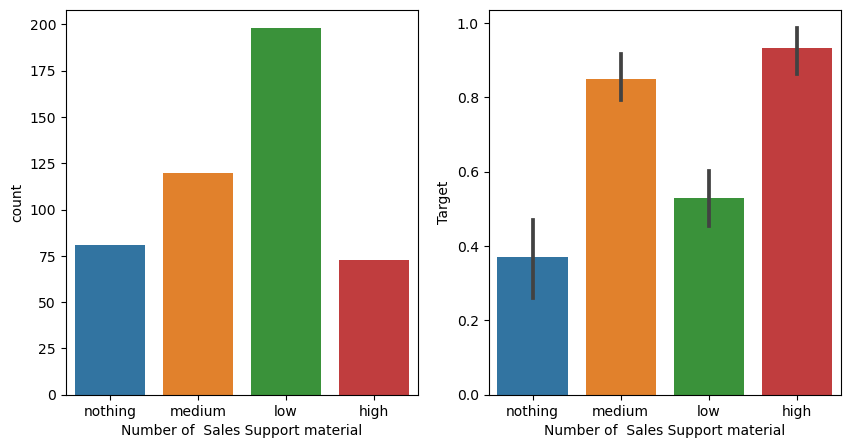

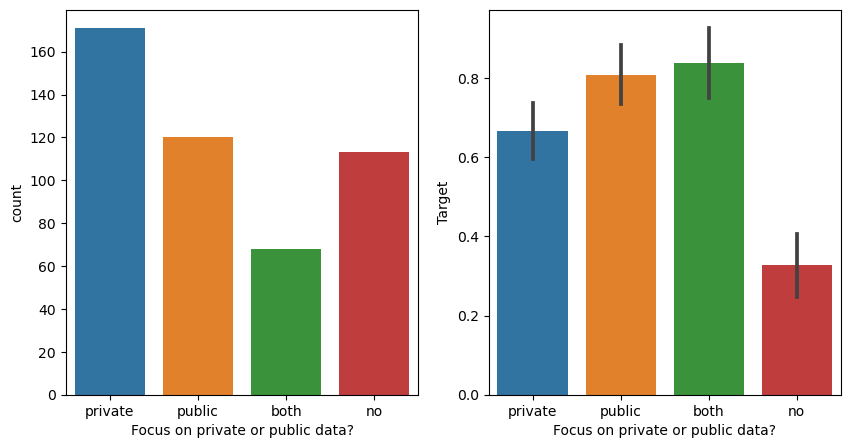

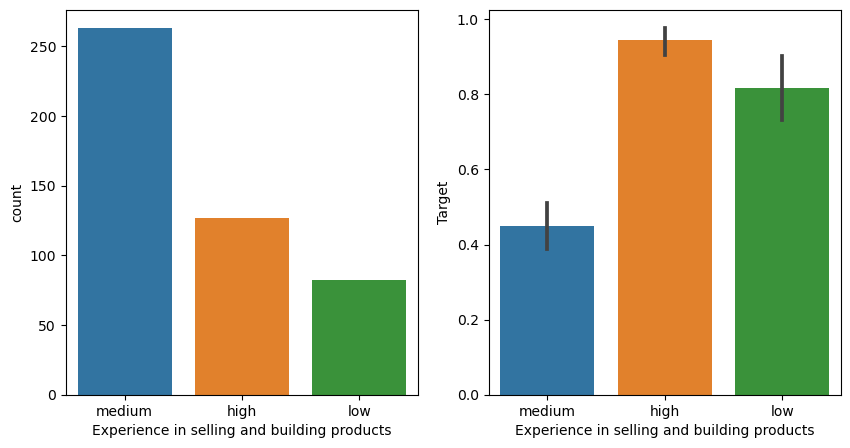

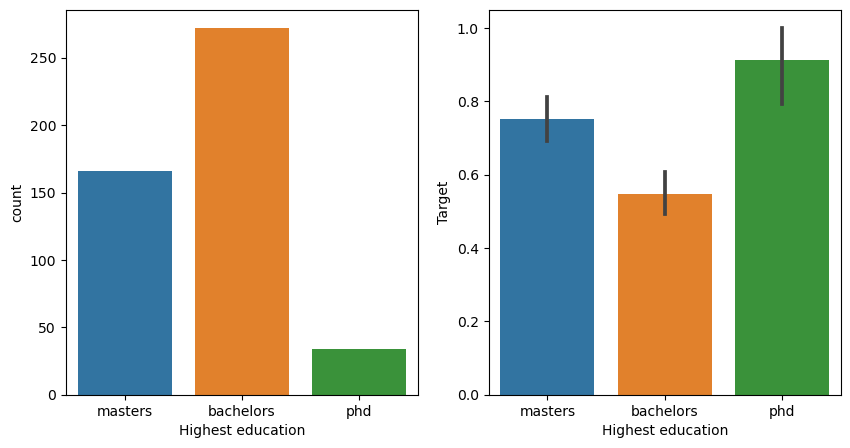

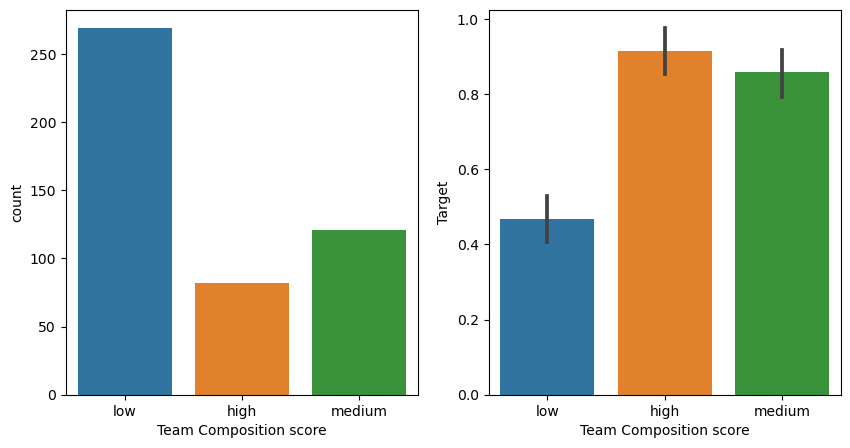

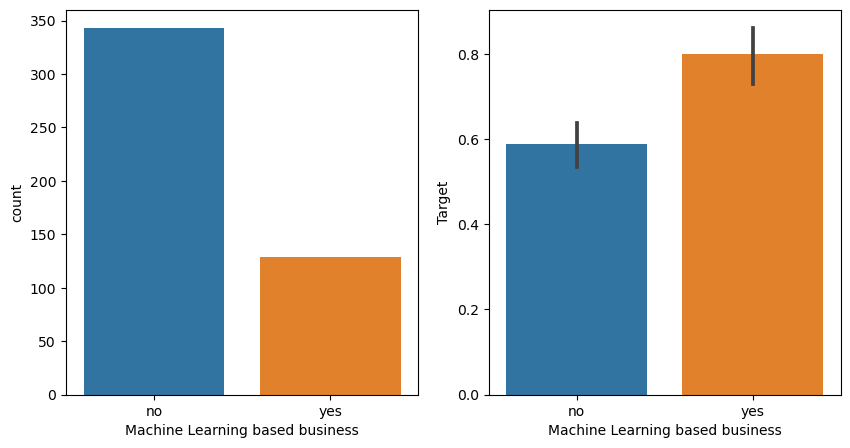

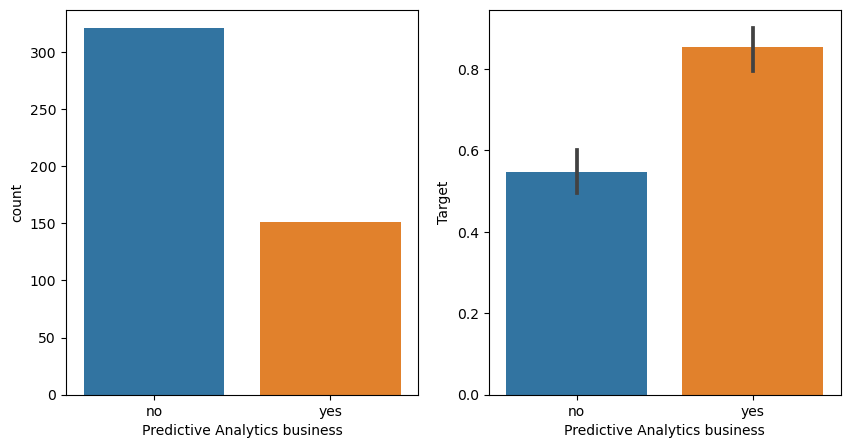

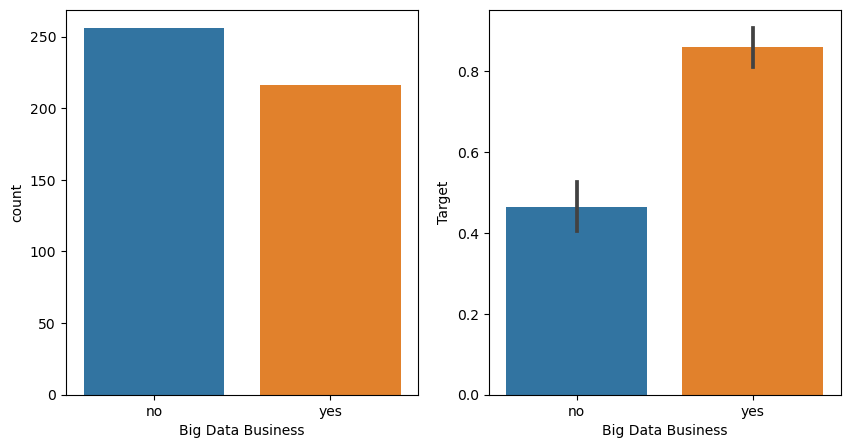

In [32]:
# Define a list of categorical column names for visualization
cat_column_names = ["Number of  Sales Support material", "Focus on private or public data?", "Experience in selling and building products",
               "Highest education", "Team Composition score", "Machine Learning based business", "Predictive Analytics business", "Big Data Business"]

# Iterate over each column name for visualization
for col_name in cat_column_names:
    
    # Create subplots with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot countplot for the current column on the first subplot
    sns.countplot(x=col_name, data=data, ax=ax1)

     # Plot barplot showing the target variable distribution for the current column on the second subplot
    sns.barplot(x=col_name, y="Target", data=data, ax=ax2)

plt.show()

# Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [34]:
# Selecting features for the model
features = data[["Target", "Age of company in years", "Employee Count", "Number of Co-founders", "Number of Investors in Seed",
                "Number of Investors in Angel and or VC", "Team size Senior leadership", "Years of education",
                "Number of Recognitions for Founders and Co-founders", "Skills score", "Average time of investment",
                "Percent_skill_Engineering", "Percent_skill_Leadership", "Percent_skill_Data Science"]]


# Separating features and target variable
X = features.drop('Target', axis=1)
y = features['Target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=112)

# Printing the shape of training and testing sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(377, 13) (377,) (95, 13) (95,)


In [35]:
# Instantiate and fit a Random Forest classifier
rf = RandomForestClassifier(random_state=112)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=112)

In [36]:
# Predict the target variable for the test set using the trained Random Forest classifier
y_pred = rf.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8315789473684211


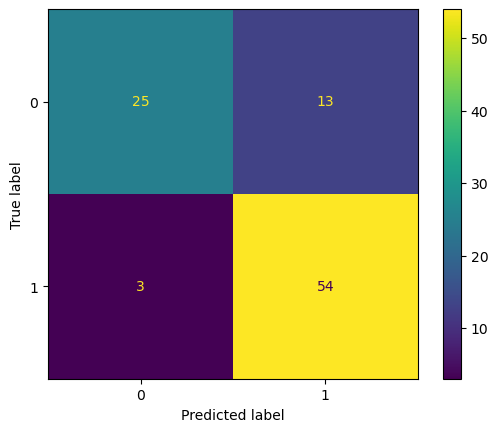

In [38]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

/var/folders/rn/2jbc093n0csfj73b8ms70wz00000gn/T/ipykernel_46186/305005812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop("Target", axis=1, inplace=True)


Text(0.5, 0, 'Feature Importance')

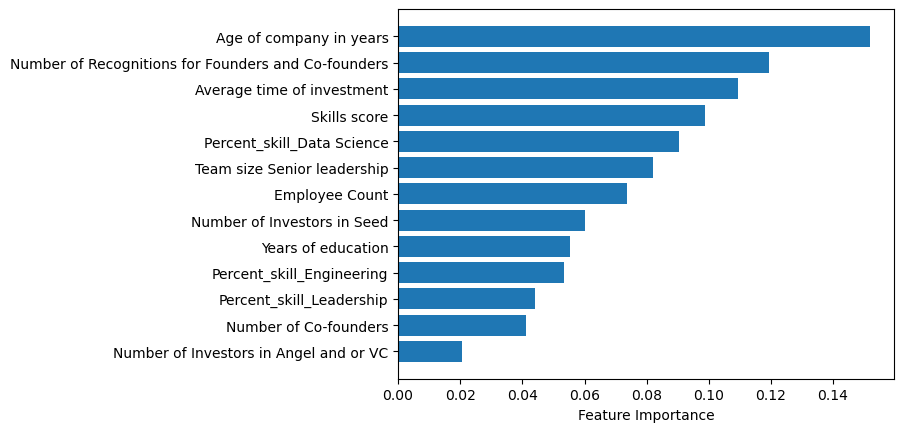

In [39]:
# Sort the indices of feature importances
sort = rf.feature_importances_.argsort()

# Drop the target variable from the features
features.drop("Target", axis=1, inplace=True)

# Create a horizontal bar plot showing feature importances
plt.barh(features.columns[sort], rf.feature_importances_[sort])

plt.xlabel("Feature Importance")

From feature importance graph we can see that age of company, number of recognitions and skill score are the important features, which means that they are positively correlated and important to take into account.